In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [7]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 41.3MB/s]


In [8]:
!unzip /content/twitter-airline-sentiment.zip

Archive:  /content/twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [0]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud

In [0]:
logging.basicConfig(level=logging.INFO)

# Utils

In [0]:
def log_info(msg,data):
    logging.info(msg=msg+': {0}'.format(data))

In [0]:
def read_csv(csv_path):
    df = pd.read_csv(csv_path)
    return df

In [0]:
file_path = '/content/Tweets.csv'
df = read_csv(file_path)


# Data Preprocessing

## Data Visualization

In [53]:
#shape of dataframe
msg = 'Shape of the dataframe is'
log_info(msg,df.shape)

INFO:root:Shape of the dataframe is: (14640, 15)


In [55]:
#info about dataframe
msg = 'The number of nulls in each column are \n'
log_info(msg,df.isna().sum())

INFO:root:The number of nulls in each column are 
: tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [57]:
#percents of null and na values
msg = 'Percentage null or na values in df'
log_info(msg,((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2))

INFO:root:Percentage null or na values in df: tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64


In [0]:
#del columns
del df['airline_sentiment_gold']
del df['negativereason_gold']
del df['tweet_coord']

In [68]:
#caculate the total number of tweet for each airline

msg = "total of tweet: \n"
data = df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)
log_info(msg,data)

INFO:root:total of tweet: 
: airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


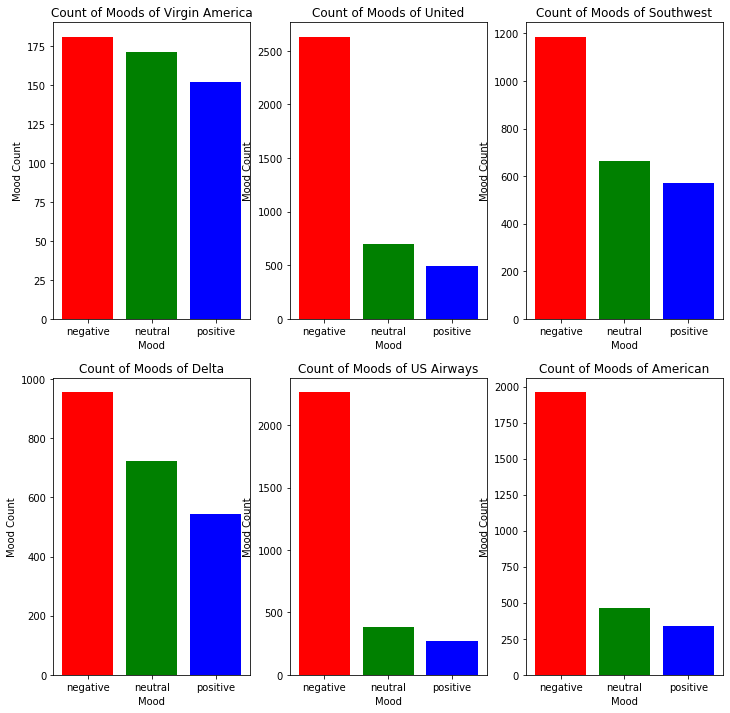

In [77]:
#bar plot number of moods for each airline
list_airline = list(df['airline'].unique())
plt.figure(1,figsize=(12, 12))
for airline in list_airline:
    index = list_airline.index(airline)
    plt.subplot(2,3,index+1)
    new_df = df[df['airline']==airline]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+airline)

In [0]:
#wordcloud for negative sentiments

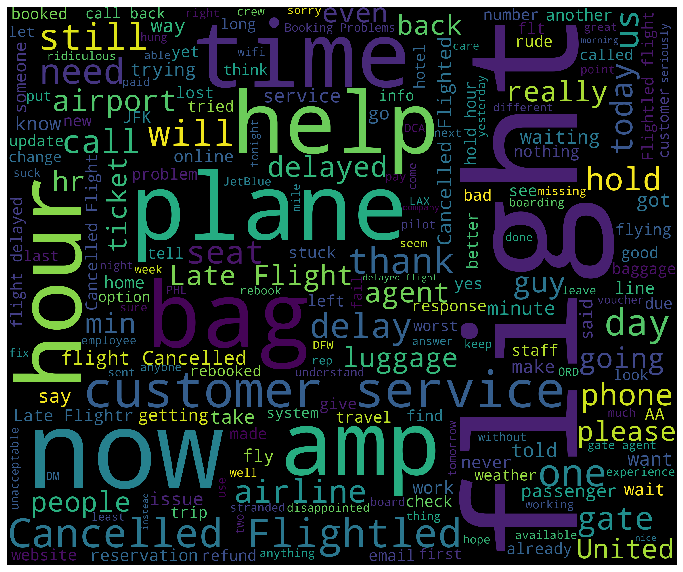

In [81]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

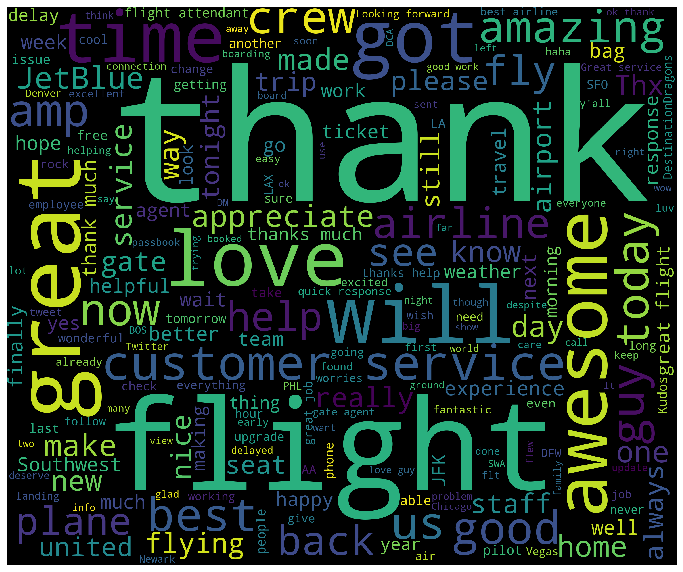

In [83]:
#wordcloud for positive sentiments
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [84]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

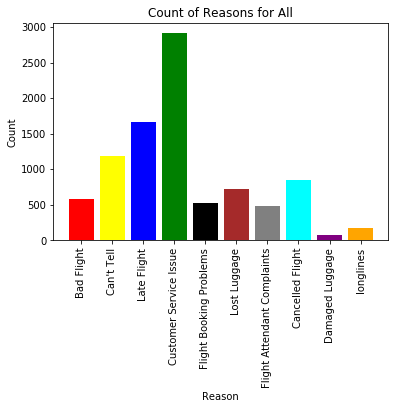

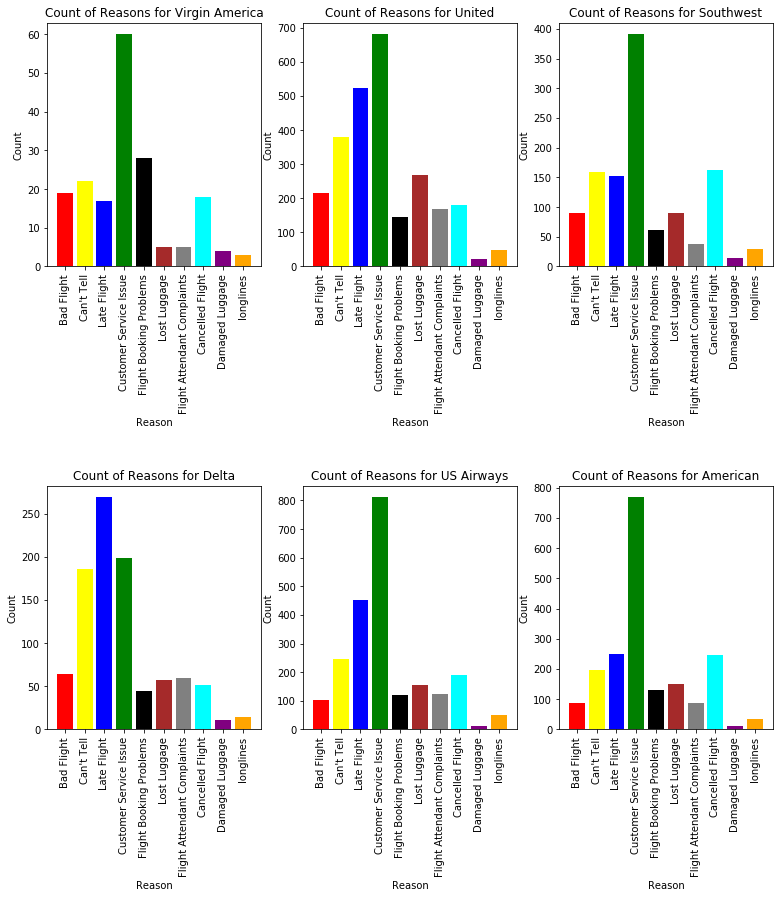

In [88]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in list_airline:
    indices= list_airline.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


In [90]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

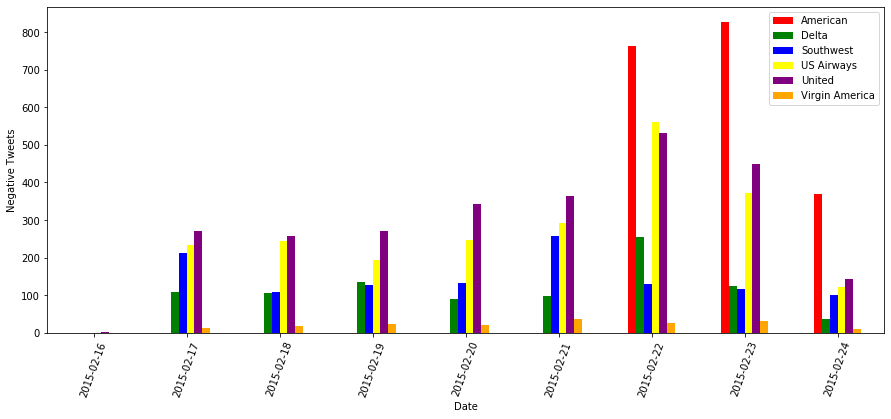

In [91]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

## Data Cleaning

In [100]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def remove_stopwords(sentence):
    return ' '.join([word for word in sentence.split() if word not in stopwords.words("english") and not word.startswith('@')])

In [0]:
def to_lower(sentence):
    return sentence.lower()

In [0]:
def get_character_only(sentence):
    sentence = re.sub("[^a-zA-Z]", " ",sentence)
    return sentence

In [0]:
def text_cleaning(text):
    text = to_lower(text)
    text = remove_stopwords(text)
    text = get_character_only(text)
    return text

In [0]:
df['cleaner_text'] = df['text'].apply(lambda x: text_cleaning(x))

# Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

In [0]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [0]:
train_cleaner_texts = []
test_cleaner_texts = []
for train_text in train['cleaner_text']:
    train_cleaner_texts.append(train_text)
for test_text in test['cleaner_text']:
    test_cleaner_texts.append(test_text)

In [0]:
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_cleaner_texts)
test_features=v.transform(test_cleaner_texts)

In [0]:
Classifiers = [
    RandomForestClassifier(n_estimators=200),
    SVC(C=1.0),
    LogisticRegression()]

Accuracy of RandomForestClassifieris 0.7687841530054644
              precision    recall  f1-score   support

    negative       0.88      0.83      0.86      2010
     neutral       0.52      0.57      0.55       533
    positive       0.60      0.72      0.66       385

    accuracy                           0.77      2928
   macro avg       0.67      0.71      0.69      2928
weighted avg       0.78      0.77      0.77      2928



<Figure size 432x288 with 0 Axes>

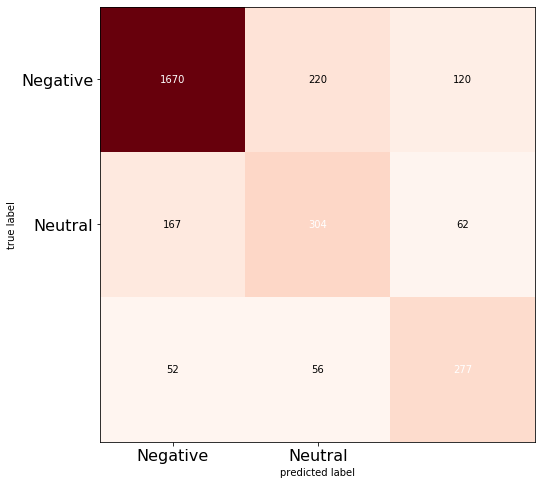

Accuracy of SVCis 0.7800546448087432
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2101
     neutral       0.51      0.62      0.56       478
    positive       0.58      0.77      0.66       349

    accuracy                           0.78      2928
   macro avg       0.67      0.73      0.69      2928
weighted avg       0.81      0.78      0.79      2928



<Figure size 432x288 with 0 Axes>

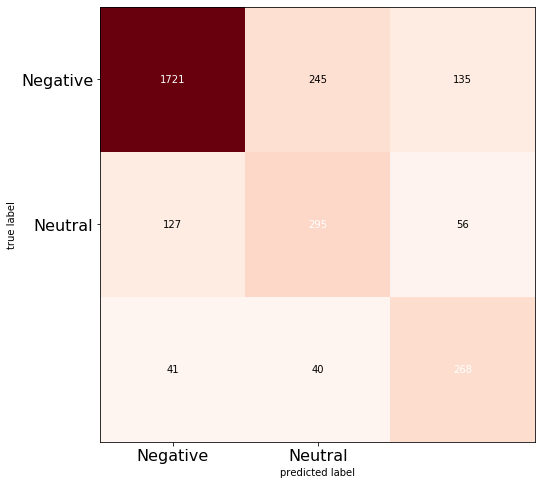

Accuracy of LogisticRegressionis 0.7879098360655737
              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      1955
     neutral       0.57      0.59      0.58       562
    positive       0.69      0.77      0.72       411

    accuracy                           0.79      2928
   macro avg       0.71      0.74      0.72      2928
weighted avg       0.79      0.79      0.79      2928



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 432x288 with 0 Axes>

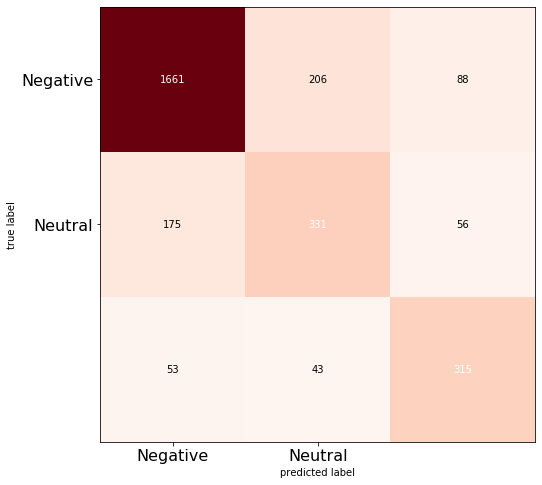

In [153]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()

In [154]:
!git init

Initialized empty Git repository in /content/.git/
